In [44]:
print("End to end ML Project Structure ")

End to end ML Project Structure 


In [45]:
import pandas as pd
import numpy as np

In [46]:
df = pd.read_csv('./DataSets/placements.csv')

In [47]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [48]:
df.shape

(100, 4)

## Step 1 : Preprocess +  EDA + Feature Selection

In [49]:
df.columns

Index(['Unnamed: 0', 'cgpa', 'iq', 'placement'], dtype='object')

In [50]:
# Remove Unnecessary Columns
df.drop(columns=['Unnamed: 0'],inplace=True)

In [51]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [52]:
# Check for null null values 
df.info()
# or

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [53]:
df.isnull()

,cgpa,iq,placement
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
95,False,False,False
96,False,False,False
97,False,False,False
98,False,False,False


In [54]:
df.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [55]:
# Check for duplicates 
duplicates = df.duplicated()
print(duplicates)

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool


In [56]:
df.drop_duplicates() # Since No duplicate values are present Nothing will be dropped  

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


Seeing the realtion Ship between Iq and CGPA

In [57]:
import matplotlib.pyplot as plt

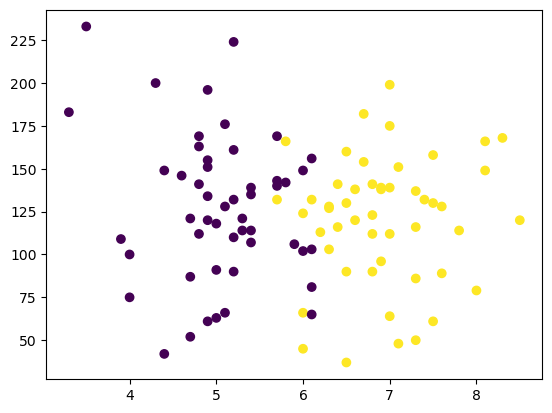

In [58]:
plt.scatter(x=df['cgpa'],y=df['iq'],c=df['placement'])

## Step 2 : Extract Input Output Cols

In [59]:
# Splitting the Depenent and Independent Columns 

In [60]:
X = df.iloc[:,0:2]
y = df.loc[:,'placement']

In [61]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [62]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

"Always split the data first, then fit the scaler on the training set and transform the test set. Otherwise, data leakage can occur."


## Step 3 : Train Test Split 

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [65]:
X_train

,cgpa,iq
18,4.0,100.0
30,7.6,128.0
73,4.9,61.0
33,6.0,149.0
90,7.3,86.0
...,...,...
60,6.9,139.0
71,6.1,132.0
14,6.1,103.0
92,5.2,110.0


In [66]:
X_test

,cgpa,iq
83,7.5,130.0
53,8.3,168.0
70,6.3,127.0
45,6.0,66.0
44,7.5,61.0
39,4.6,146.0
22,4.9,120.0
80,4.9,196.0
10,6.0,45.0
0,6.8,123.0


In [67]:
y_train

18    0
30    1
73    0
33    0
90    1
     ..
60    1
71    1
14    0
92    0
51    0
Name: placement, Length: 90, dtype: int64

In [68]:
y_test

83    1
53    1
70    1
45    1
44    1
39    0
22    0
80    0
10    1
0     1
Name: placement, dtype: int64

## Step 4 : Scales the Values

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

In [71]:
X_train = scaler.fit_transform(X_train)

In [72]:
X_train

array([[-1.73718527, -0.62029848],
       [ 1.45537303,  0.09806189],
       [-0.9390457 , -1.62087186],
       [ 0.03645823,  0.63683217],
       [ 1.1893265 , -0.97947867],
       [-0.14090612,  0.45724208],
       [-0.9390457 ,  0.79076654],
       [ 1.1893265 , -1.90308486],
       [-0.49563482,  0.3802749 ],
       [-1.82586745, -0.38939693],
       [ 1.63273738, -0.26111829],
       [-1.38245657,  0.63683217],
       [ 0.92327998,  1.91961855],
       [ 1.45537303, -0.90251149],
       [ 2.2535126 , -0.10718393],
       [-0.76168135,  1.32953682],
       [-0.9390457 ,  0.25199626],
       [-1.38245657, -2.10833068],
       [-0.76168135, -1.49259322],
       [ 1.1893265 , -0.20980684],
       [ 0.8345978 ,  0.35461917],
       [-0.67299917,  0.9447009 ],
       [-0.14090612,  1.07297954],
       [-0.67299917, -0.87685576],
       [ 0.74591563, -0.31242975],
       [ 1.01196215, -1.95439632],
       [ 0.8345978 , -0.72292139],
       [ 1.8987839 ,  1.07297954],
       [ 0.74591563,

In [73]:
X_test = scaler.transform(X_test)

In [74]:
X_test

array([[ 1.36669085,  0.14937335],
       [ 2.07614825,  1.124291  ],
       [ 0.30250475,  0.07240616],
       [ 0.03645823, -1.49259322],
       [ 1.36669085, -1.62087186],
       [-1.20509222,  0.55986499],
       [-0.9390457 , -0.10718393],
       [-0.9390457 ,  1.84265137],
       [ 0.03645823, -2.0313635 ],
       [ 0.74591563, -0.03021675]])

## Step 5 : Train The Model

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
clf = LogisticRegression()

In [77]:
clf.fit(X_train,y_train)

LogisticRegression()

## Step 6  : Evaluate The model

In [82]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [83]:
y_test

83    1
53    1
70    1
45    1
44    1
39    0
22    0
80    0
10    1
0     1
Name: placement, dtype: int64

In [84]:
from sklearn.metrics import accuracy_score

In [86]:
a_score = accuracy_score(y_test,y_pred) 
a_score

0.8

How to Plot Desicion Boundary means -- > What is the patern observed by the ML Algorithm ? 

In [87]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

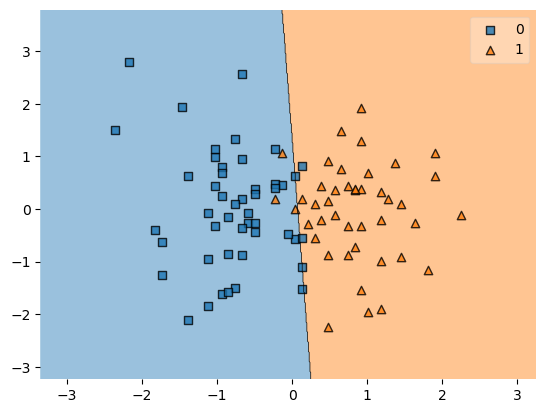

In [89]:
plot_decision_regions(X_train,y_train.values,clf=clf)

## Step 7 : Deploy The Model

In [90]:
import pickle 

In [92]:
pickle.dump(clf,open('Dya13.pkl','wb'))